# EXERCISE 2 a
## part b

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
alpha = -1
beta = 1.5
epsilon = 0.1
x_0 = 0
x_N = 1
N = 1000+1
x = np.linspace(x_0, x_N, N)
h = x[1] - x[0]
u = np.linspace(alpha, beta, N)

# Function to compute the residual F(u)
def F(u,N):
    F = np.zeros(N-2)
    for i in range(1, N-1):
        u_prime = (u[i+1] - u[i-1]) / (2*h)  # First derivative
        u_double_prime = (u[i+1] - 2*u[i] + u[i-1]) / (h**2)  # Second derivative
        F[i-1] = epsilon * u_double_prime + u[i] * (u_prime - 1)
    return F

# Function to compute the Jacobian J(u)
def J(u,N):
    jacobian = np.zeros((N-2, N-2))
    
    for i in range(1, N-1):
        # Main diagonal
        jacobian[i-1, i-1] = -(2*epsilon)/h**2 + (u[i+1] - u[i-1]) / (2*h) - 1
        # Upper diagonal (i -> i+1)
        if i < N-2:
            jacobian[i-1, i] = epsilon/h**2 + u[i] / (2*h)
        # Lower diagonal (i -> i-1)
        if i > 1:
            jacobian[i-1, i-2] = epsilon/h**2 - u[i] / (2*h)
    
    return jacobian

# Newton's method to iteratively update u
def newton_method(u,N, tol=1e-6, max_iter=100):
    iter_count = 0
    while iter_count < max_iter:
        # Compute the residual and Jacobian
        F_u = F(u,N)
        J_u = J(u,N)
        
        # Check for convergence (if F(u) is small enough)
        if np.max(np.abs(F_u)) < tol:
            print(f"Converged after {iter_count} iterations")
            break
        
        # Update the solution using Newton's method
        delta_u = np.linalg.solve(J_u, -F_u)  # Solve J(u) * delta_u = -F(u)
        u[1:-1] = u[1:-1] + delta_u  # Update u (excluding the boundary points)

        iter_count += 1
    
    return u


Converged after 4 iterations


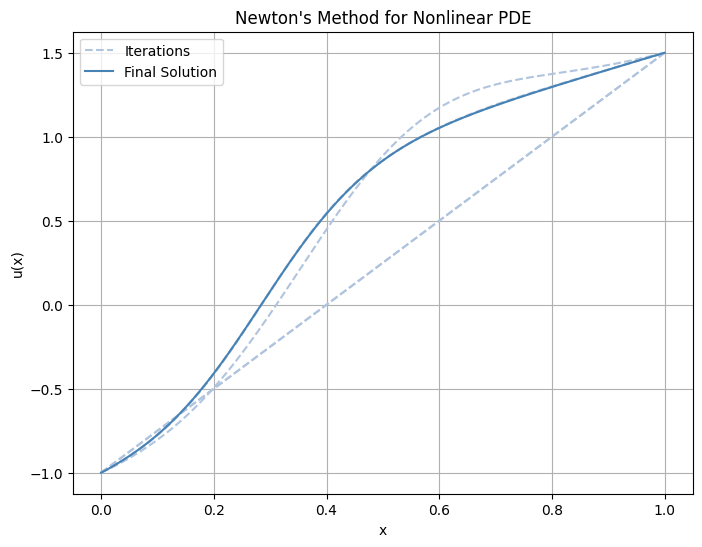

In [15]:
# Newton's method to iteratively update u
def newton_method_plot(u, N, x, tol=1e-8, max_iter=100):
    plt.figure(figsize=(8, 6))
    plt.plot(x, u, linestyle='--', color='lightsteelblue', label='Iterations')

    iter_count = 0
    while iter_count < max_iter:
        # Compute the residual and Jacobian
        F_u = F(u,N)
        J_u = J(u,N)
        
        # Check for convergence
        if np.max(np.abs(F_u)) < tol:
            print(f"Converged after {iter_count} iterations")
            plt.plot(x, u, linestyle='-', color='steelblue', label='Final Solution')
            break
        else:
            plt.plot(x, u, linestyle='--', color='lightsteelblue')
        
        # Update the solution using Newton's method
        delta_u = np.linalg.solve(J_u, -F_u)  # Solve J(u) * delta_u = -F(u)
        u[1:-1] += delta_u  # Update u (excluding the boundary points)

        iter_count += 1
    
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title("Newton's Method for Nonlinear PDE")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return u

u = np.linspace(alpha, beta, N)
# Run Newton's method and plot the results
u_final = newton_method_plot(u, N, x)
